In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [255]:
df = pd.read_csv('/Users/manimohan/Downloads/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [256]:
#Treating Missing Values

#questions I ask for treating missing values
#How prevalent is the missing data?
#Is missing data random or does it have a pattern?


# (COunt of null in every col/total records)--> sort values in descending and select only the values with >0
missing=pd.DataFrame((df.isnull().sum()/df.count()[0]).sort_values(ascending=False),columns=['Percentage'])
missing['total']=df.isnull().sum()
# select only the cols which have missing values
missing=missing.loc[(missing.Percentage>0)]
print(missing)


#Comments:
# PoolQC, MiscFeature, Alley, Fence have more than 80% in missing values. Lets delete them.
# FireplaceQu,LotFrontage ahve more than 10% in missing data, lets discard the col as well.
# All Garage data seems to miss 5% of the data. I hope 5% of the records have data issues in this col. 
#            Lets fill these obeservations with NA (i.e.) NO garage available
# All Basement data seems to miss 2% of the data. I hope 2% of the records have data issues in this col. 
#            Lets fill these obeservations (i.e.) NO garage available
#for other cols we will fill the mode (categorical values) or mean value (if numerical))



#actions
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1,inplace=True)

#garage
df['GarageCond']=df['GarageCond'].fillna('NA')
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(999)

#basement
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtQual']=df['BsmtQual'].fillna('NA')

#other features
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0]) #--> see how to fill with mode
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])


#check to see if we have missing values still
print('---------check to see if we have missing values still-------------')
missing=pd.DataFrame((df.isnull().sum()/df.count()[0]).sort_values(ascending=False),columns=['Percentage'])
missing=missing.loc[(missing.Percentage>0)]
print(missing)





              Percentage  total
PoolQC          0.995205   1453
MiscFeature     0.963014   1406
Alley           0.937671   1369
Fence           0.807534   1179
FireplaceQu     0.472603    690
LotFrontage     0.177397    259
GarageCond      0.055479     81
GarageType      0.055479     81
GarageYrBlt     0.055479     81
GarageFinish    0.055479     81
GarageQual      0.055479     81
BsmtExposure    0.026027     38
BsmtFinType2    0.026027     38
BsmtFinType1    0.025342     37
BsmtCond        0.025342     37
BsmtQual        0.025342     37
MasVnrArea      0.005479      8
MasVnrType      0.005479      8
Electrical      0.000685      1
---------check to see if we have missing values still-------------
Empty DataFrame
Columns: [Percentage]
Index: []


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
--------Distribution----------
SalePrice
skew:  1.8828757597682129
Kurtosis:  6.536281860064529


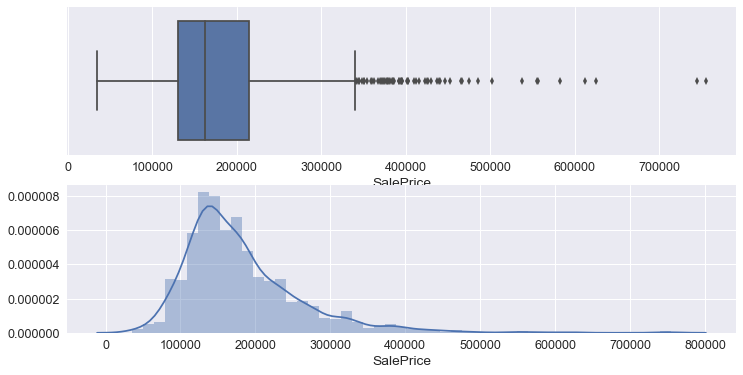

In [257]:
# Dependent Variable Analysis

print(df.SalePrice.describe())
print('--------Distribution----------')
final_list=['SalePrice']
for col in final_list:
    f,(ax1,ax2)=plt.subplots(nrows=2,ncols=1, figsize=(12,6))
    print(col)
    print('skew: ',df[col].skew())
    print('Kurtosis: ',df[col].kurt())
    sns.boxplot(df[col], ax=ax1)
    sns.distplot(df[col], ax=ax2)
    plt.show()
    
    
#comments
#distribution is not normal
#skew=1.6 , meaning, they have positive skewness
#Kurtosis=6.5 , shows peakedness

#transformation needed for normality

LotArea
skew:  12.207687851233496
Kurtosis:  203.24327101886033


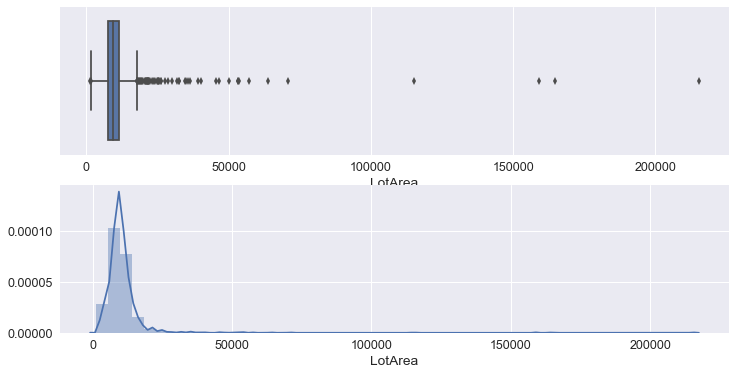

MasVnrArea
skew:  2.6776164510820997
Kurtosis:  10.141416177298794


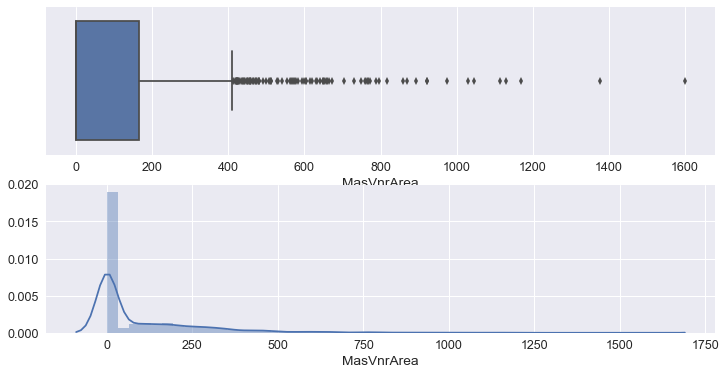

BsmtFinSF1
skew:  1.685503071910789
Kurtosis:  11.118236291964712


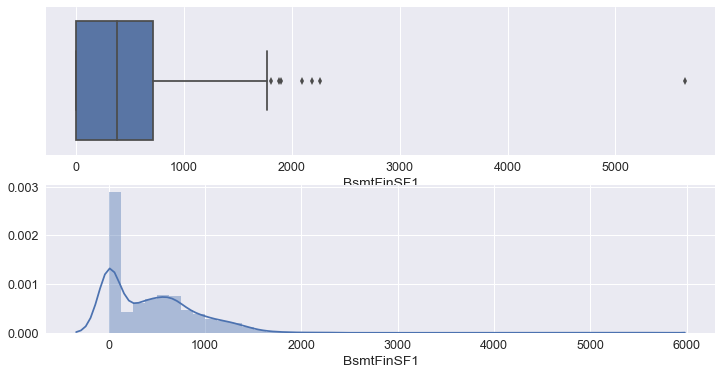

BsmtFinSF2
skew:  4.255261108933303
Kurtosis:  20.11333754558646


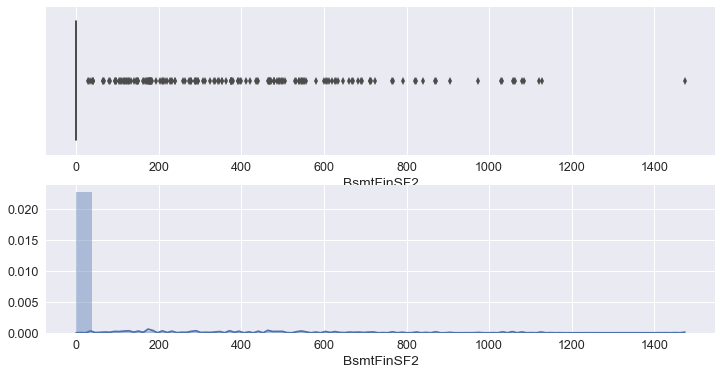

BsmtUnfSF
skew:  0.9202684528039037
Kurtosis:  0.47499398780908475


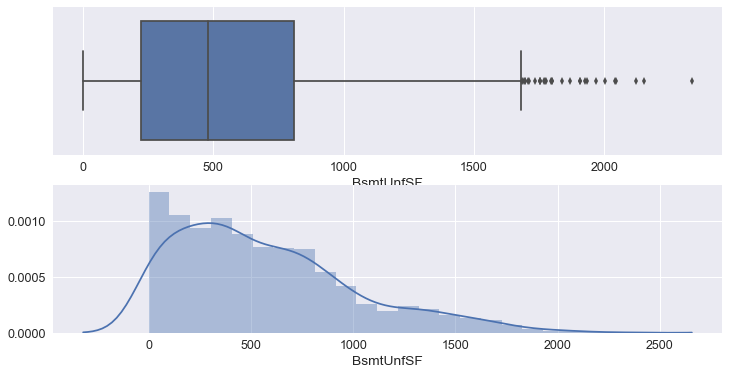

TotalBsmtSF
skew:  1.5242545490627664
Kurtosis:  13.250483281984796


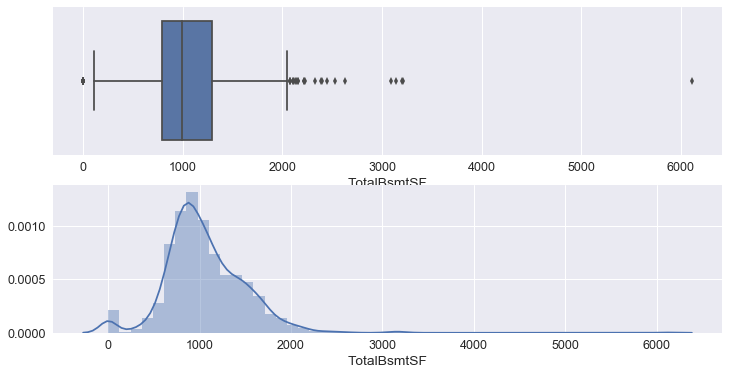

1stFlrSF
skew:  1.3767566220336365
Kurtosis:  5.74584148244079


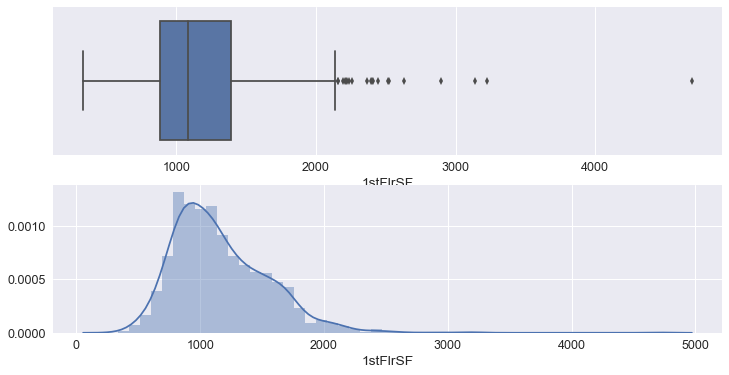

2ndFlrSF
skew:  0.8130298163023265
Kurtosis:  -0.5534635576075795


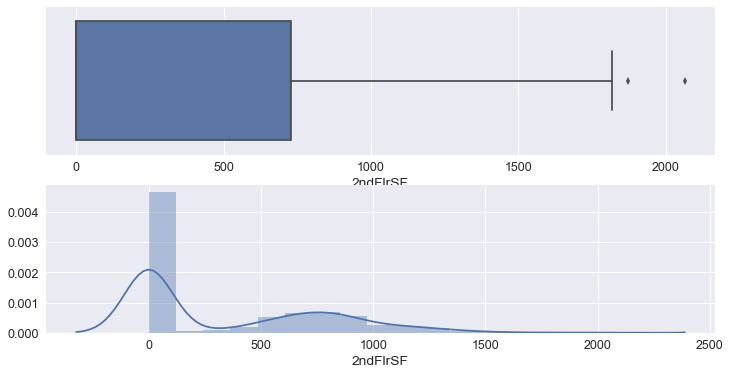

LowQualFinSF
skew:  9.011341288465387
Kurtosis:  83.2348166744174


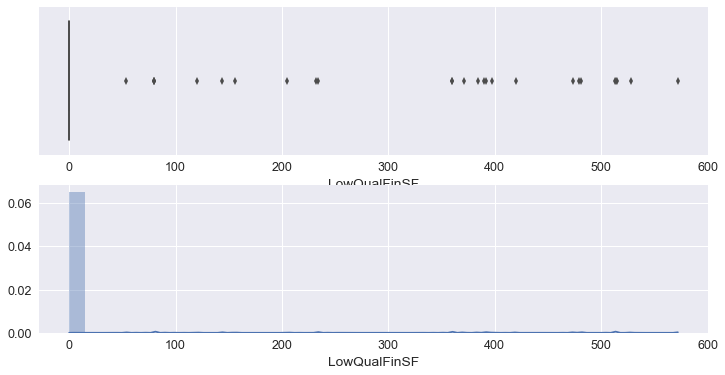

GrLivArea
skew:  1.3665603560164552
Kurtosis:  4.895120580693174


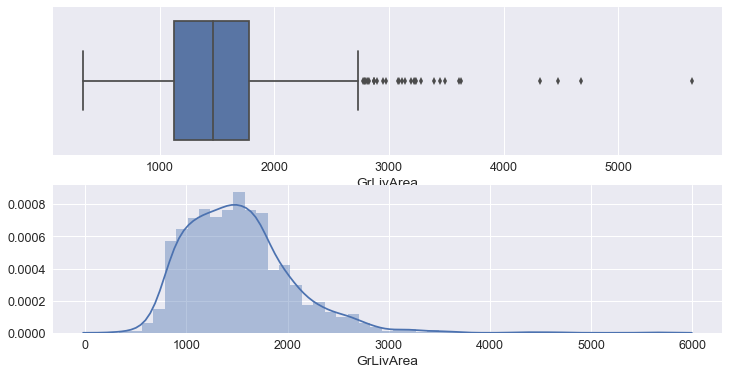

MiscVal
skew:  24.476794188821916
Kurtosis:  701.0033422801193


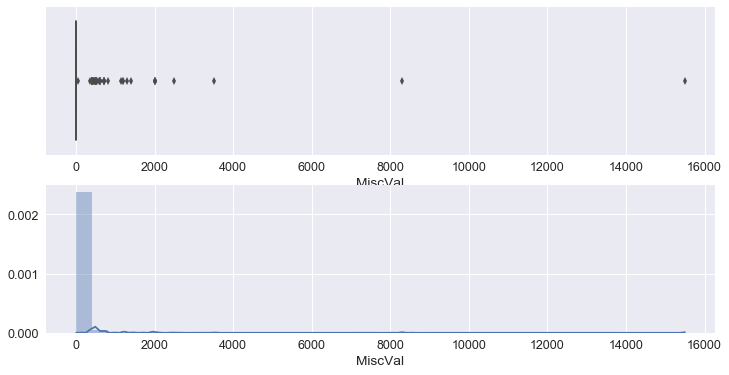

PoolArea
skew:  14.828373640750588
Kurtosis:  223.2684989181717


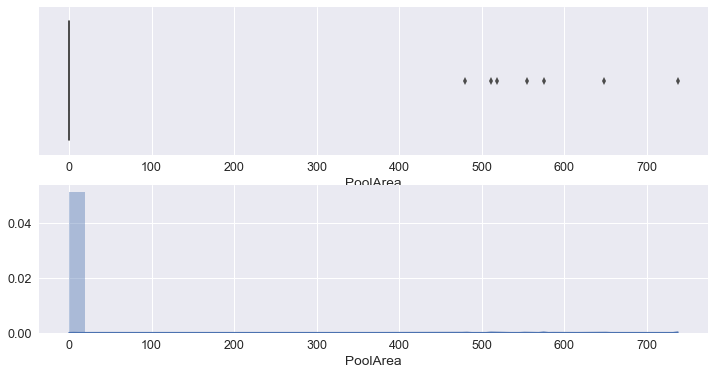

ScreenPorch
skew:  4.122213743143115
Kurtosis:  18.43906784486968


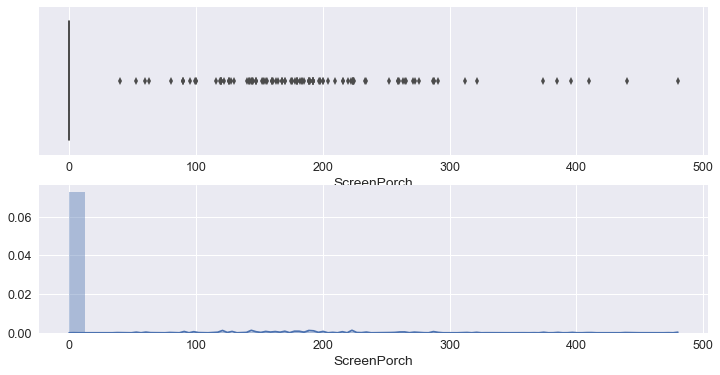

3SsnPorch
skew:  10.304342032693112
Kurtosis:  123.66237944970538


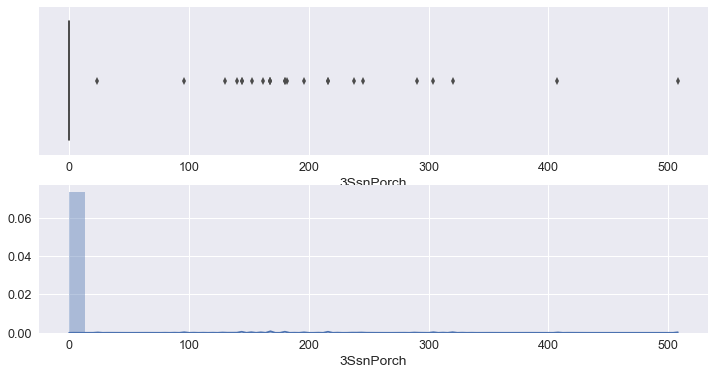

EnclosedPorch
skew:  3.08987190371177
Kurtosis:  10.430765944030428


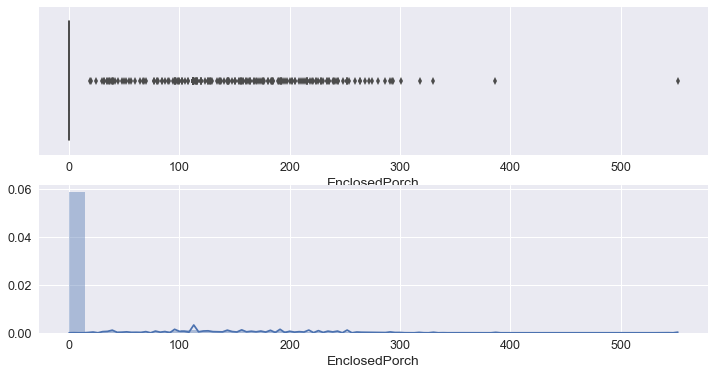

OpenPorchSF
skew:  2.3643417403694404
Kurtosis:  8.490335805910506


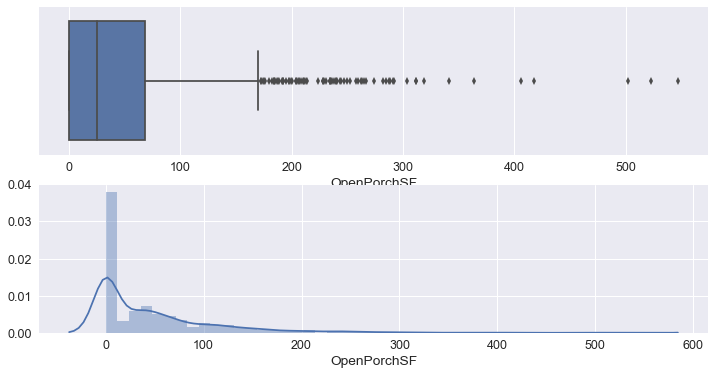

WoodDeckSF
skew:  1.5413757571931312
Kurtosis:  2.992950924703908


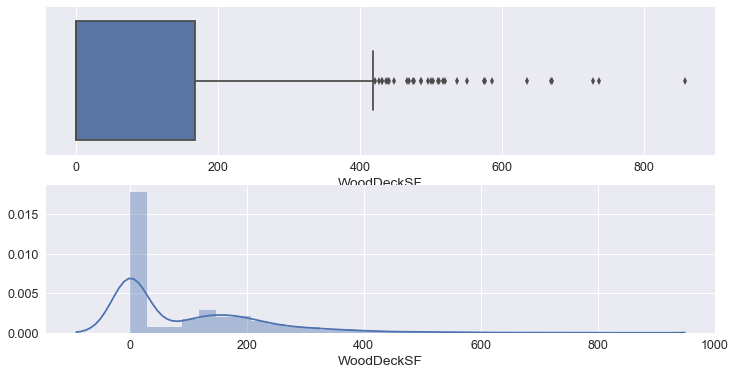

GarageArea
skew:  0.17998090674623907
Kurtosis:  0.9170672022708684


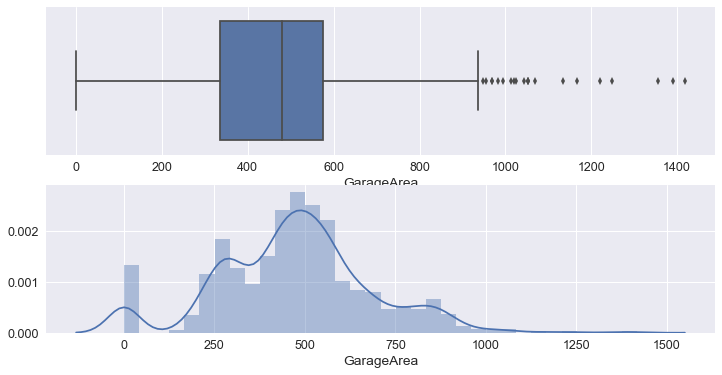

['MSSubClass_E', 'OverallQual_E', 'OverallCond_E', 'BsmtFullBath_E', 'BsmtHalfBath_E', 'FullBath_E', 'HalfBath_E', 'YearBuilt_E', 'YearRemodAdd_E', 'YrSold_E', 'MoSold_E', 'GarageCars_E', 'Fireplaces_E', 'KitchenAbvGr_E', 'BedroomAbvGr_E']


In [258]:
#Univariate Analysis for Quantitative variables

#numerical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.drop(['Id','SalePrice'],axis=1,inplace=True)

#differentiate qualitative and quantitaive variables (i did this by going over the histogram)
Qualitative=['MSSubClass','YearRemodAdd', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageCars', 'GarageYrBlt', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr']

Quantitative=['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea']


#check Quallitative/Quantitative variables
final_list=Quantitative
for col in final_list:
    f,(ax1,ax2)=plt.subplots(nrows=2,ncols=1, figsize=(12,6))
    print(col)
    print('skew: ',df[col].skew())
    print('Kurtosis: ',df[col].kurt())
    sns.boxplot(df[col], ax=ax1)
    sns.distplot(df[col], ax=ax2)
    plt.show()
    
#None of the quantitative variables are Normal/ also show skewness and peakedness - NEED TRANSFORMATION
#one of the assumptions of multipe regression is MULTIVARIATE NORMALITY


#---------how to treat nominal variables-------------------
#https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
#https://stackoverflow.com/questions/29528628/how-to-specify-a-variable-in-pandas-as-ordinal-categorical

#comments: We will keep YearBuilt,YrSold as is but convert YearRemodAdd and GarageYrBlt to continuous variables (difference with yearbuilt)
#          we will leave other nominal variables as it
df['YearRemodAdd_1']=df.YearRemodAdd-df.YearBuilt
df['GarageYrBlt_1']=df.GarageYrBlt-df.YearBuilt

Qualitative.remove('YearRemodAdd')
Qualitative.remove('GarageYrBlt')

#Order qulitative variables according to sale price mean

Qualitative.remove('TotRmsAbvGrd') #giving error. Dont know why.

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

qual_encoded = []
for q in Qualitative:  
    encode(df, q)
    qual_encoded.append(q+'_E')
    
print(qual_encoded)



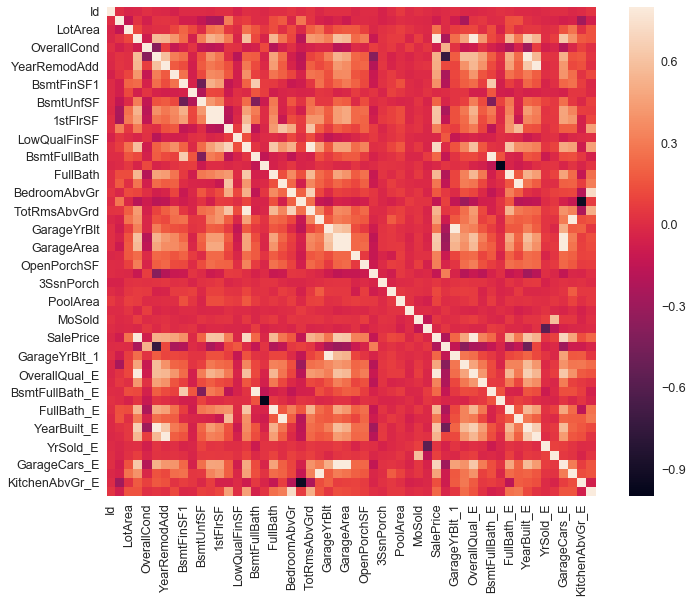

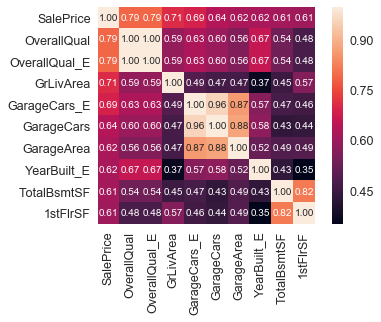

In [259]:
#check correlation

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show();

#lets check the top 20 most influencial variables
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#comments
#1. 'OverallQual' (corr with saleprice=0.79), 'GrLivArea'(corr with saleprice=0.71) 
#    and 'TotalBsmtSF'(corr with saleprice=0.61) are strongly correlated with 'SalePrice'.
#2. 'GarageCars' and 'GarageArea' are correlated. We will drop GarageArea as GarageCars is more correlated with salePrice
#3. 'TotalBsmtSF' and '1stFloor' are correlated. We will drop either of the two as both are correlated with salePrice equally
#4.  'TotRmsAbvGrd' and 'GrLivArea' are correlated. We will drop TotRmsAbvGrd as GrLivArea is more correlated with salePrice

df.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1,inplace=True)
#also remove this from the list of quantitative variables
Quantitative.remove('GarageArea')
Quantitative.remove('1stFlrSF')
#Quantitative.remove('TotRmsAbvGrd')



outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]
/n-------looking for outliers------------


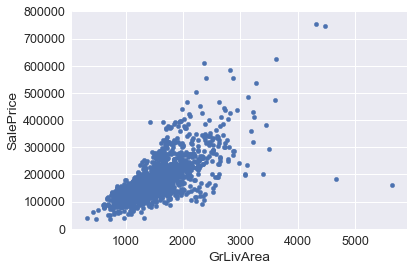

-------looking for outliers------------


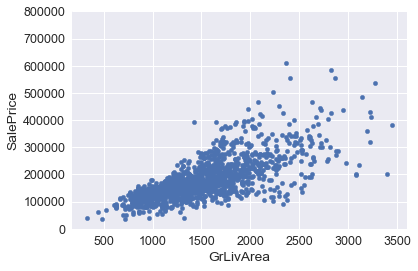

In [260]:
#outliers

#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

#looks like the top 10 extreme points are all above 3.5 STD from mean. Lets vizualize them
print('/n-------looking for outliers------------')
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.show()

#All the seven points seems to have more than 3450 GRLivingArea. Could be a big mansion or something. As of now, we will remove the data
df.drop(df.index[(df.GrLivArea>3450)], inplace=True) #-->see how

#Check to see if there are any more outliers
print('-------looking for outliers------------')
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.show()



In [261]:
#label encoder


#------categorical encoding-------------------

#function to re-order categorical encoded columns with regards to sale price mean
#we can also re-order them based on frequency of variables, but for this case, I have decided to rank order categories
#   based on salePrice mean


def encoded_categories(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

#Categorical encoding and re-arrangement based on salePrice Mean:
#Step1: For every Categorical col, store the col name and the label encoder object in a dict
#       This way, when we score the Validation data, the label encoder object for any col can be called easily
#Step2: Fit and transform the col using LabelEncoder object.
#Step3: Call the re-arrangement function

from sklearn.preprocessing import LabelEncoder
cat_rearranged_values={}
cat_encoded={}

for col in df.select_dtypes(include='O').columns:
    label_encoder[col]=LabelEncoder()
    label_encoder[col].fit(df[col])        #Save the object as a dict value
    df[col+'_encoded']=label_encoder[col].transform(df[col]) #call the transformation
    encoded_categories(df,col+'_encoded')  #call the function
    cat_encoded[col+'_encoded']=col+'_encoded_E' #add the encoded col and the re-arranged col to dict (for future ref)
    df[col+'_coded_E']=df[col+'_encoded_E'].astype('int')
        
    #Get the encoded and Rearranged values in a dict: useful while transforming new data while scoring
    temp=pd.DataFrame(df[[col+'_encoded',col+'_encoded_E']].groupby([col+'_encoded',col+'_encoded_E']).count())
    temp.reset_index(drop=False, inplace=True)
    cat_rearranged_values[col+'_encoded']=dict(zip(temp[col+'_encoded'], temp[col+'_encoded_E']))

print(cat_encoded)
print('----------------------------')                        
print(cat_rearranged_values)

{'MSZoning_encoded': 'MSZoning_encoded_E', 'Street_encoded': 'Street_encoded_E', 'LotShape_encoded': 'LotShape_encoded_E', 'LandContour_encoded': 'LandContour_encoded_E', 'Utilities_encoded': 'Utilities_encoded_E', 'LotConfig_encoded': 'LotConfig_encoded_E', 'LandSlope_encoded': 'LandSlope_encoded_E', 'Neighborhood_encoded': 'Neighborhood_encoded_E', 'Condition1_encoded': 'Condition1_encoded_E', 'Condition2_encoded': 'Condition2_encoded_E', 'BldgType_encoded': 'BldgType_encoded_E', 'HouseStyle_encoded': 'HouseStyle_encoded_E', 'RoofStyle_encoded': 'RoofStyle_encoded_E', 'RoofMatl_encoded': 'RoofMatl_encoded_E', 'Exterior1st_encoded': 'Exterior1st_encoded_E', 'Exterior2nd_encoded': 'Exterior2nd_encoded_E', 'MasVnrType_encoded': 'MasVnrType_encoded_E', 'ExterQual_encoded': 'ExterQual_encoded_E', 'ExterCond_encoded': 'ExterCond_encoded_E', 'Foundation_encoded': 'Foundation_encoded_E', 'BsmtQual_encoded': 'BsmtQual_encoded_E', 'BsmtCond_encoded': 'BsmtCond_encoded_E', 'BsmtExposure_encoded

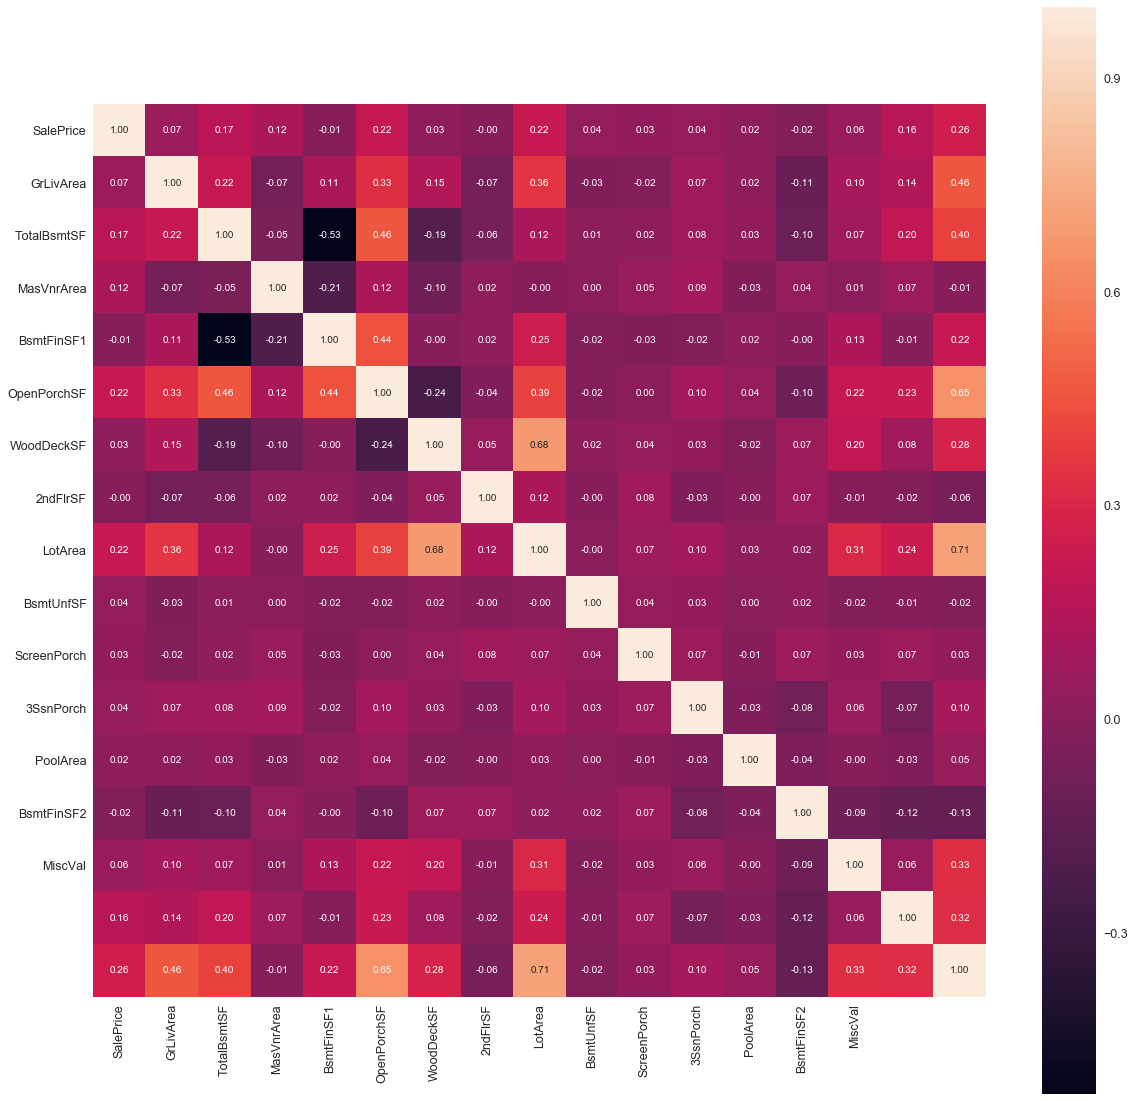

LotArea_standardized
skew:  0.037925738707776456
Kurtosis:  5.481283984409971


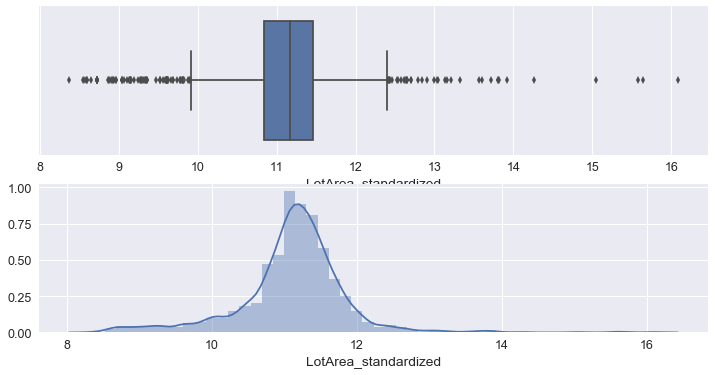

MasVnrArea_standardized
skew:  0.40323914530322785
Kurtosis:  -1.8262397065363012


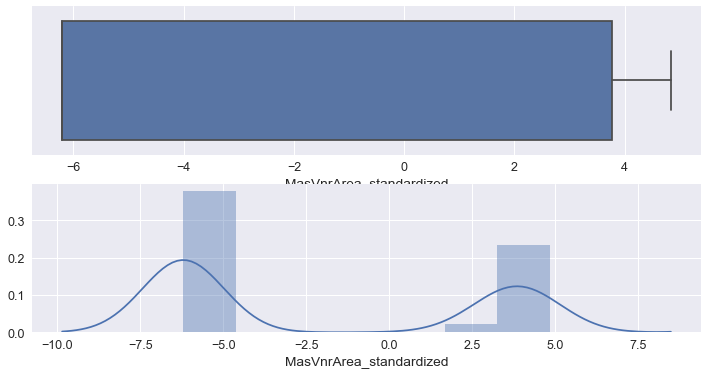

TotalBsmtSF_standardized
skew:  -0.3448527570542132
Kurtosis:  2.2389081314767827


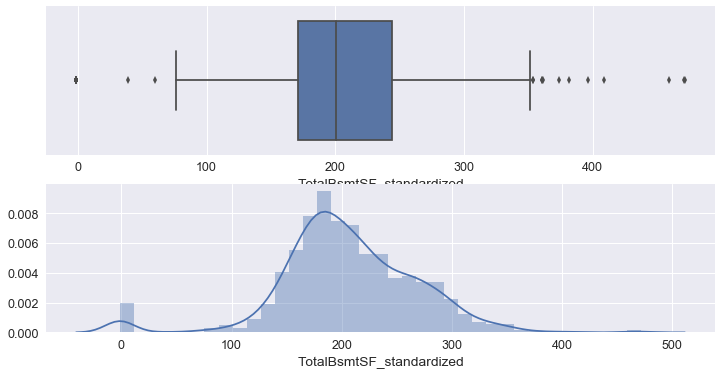

2ndFlrSF_standardized
skew:  0.28749542059147914
Kurtosis:  -1.917145029622642


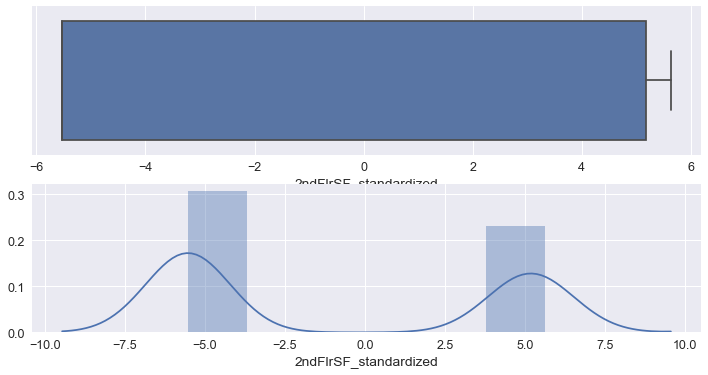

GrLivArea_standardized
skew:  -0.0021677535283741835
Kurtosis:  -0.13511558324288586


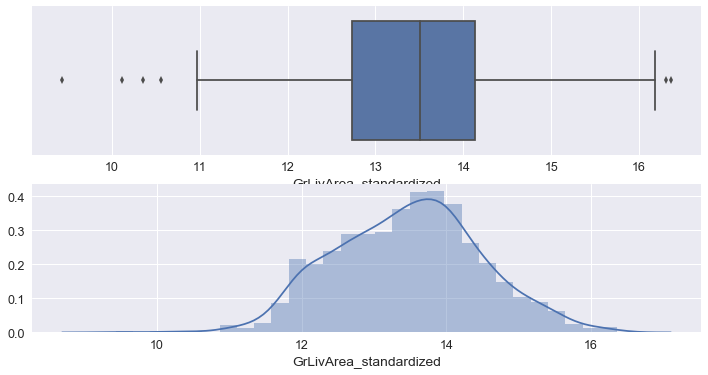

EnclosedPorch_standardized
skew:  2.039912313265625
Kurtosis:  2.1642227490152157


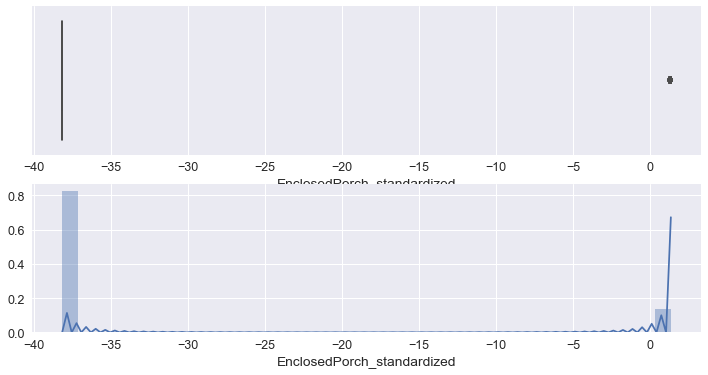

OpenPorchSF_standardized
skew:  -0.13168850683664315
Kurtosis:  -1.8976321301894634


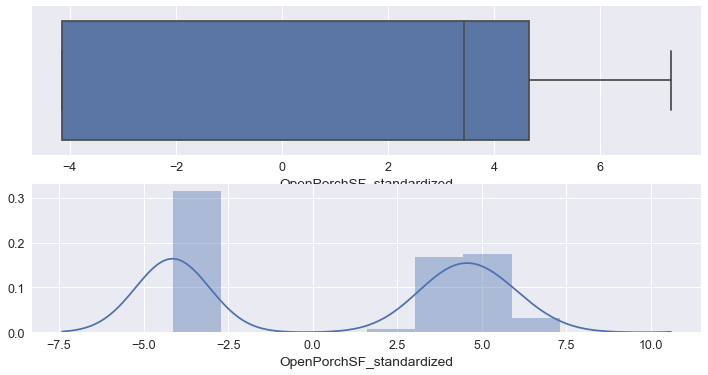

WoodDeckSF_standardized
skew:  0.10730295554645801
Kurtosis:  -1.9724365040214211


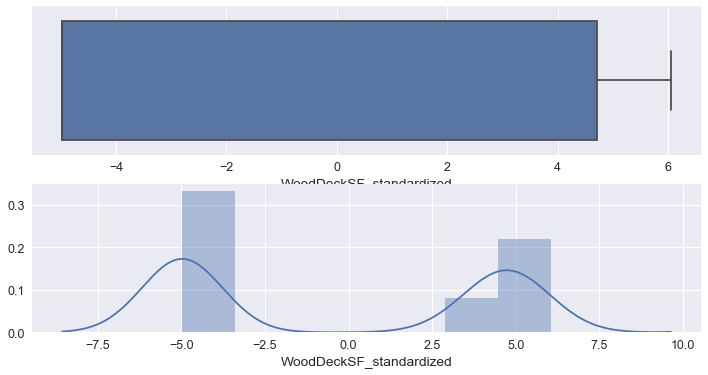

totalPorch_standardized
skew:  2.7522094856136
Kurtosis:  5.582339052565971


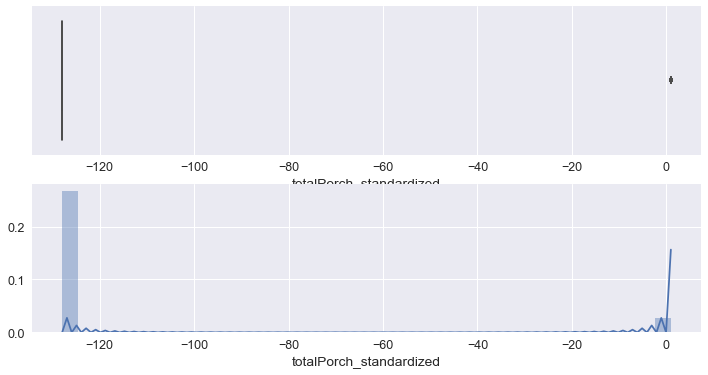

------these are the objects-------
{'LotArea': PowerTransformer(copy=True, method='box-cox', standardize=False), 'MasVnrArea': PowerTransformer(copy=True, method='box-cox', standardize=False), 'TotalBsmtSF': PowerTransformer(copy=True, method='box-cox', standardize=False), '2ndFlrSF': PowerTransformer(copy=True, method='box-cox', standardize=False), 'GrLivArea': PowerTransformer(copy=True, method='box-cox', standardize=False), 'EnclosedPorch': PowerTransformer(copy=True, method='box-cox', standardize=False), 'OpenPorchSF': PowerTransformer(copy=True, method='box-cox', standardize=False), 'WoodDeckSF': PowerTransformer(copy=True, method='box-cox', standardize=False), 'totalPorch': PowerTransformer(copy=True, method='box-cox', standardize=False)}
---------Sale price correlation with the selected variables----------


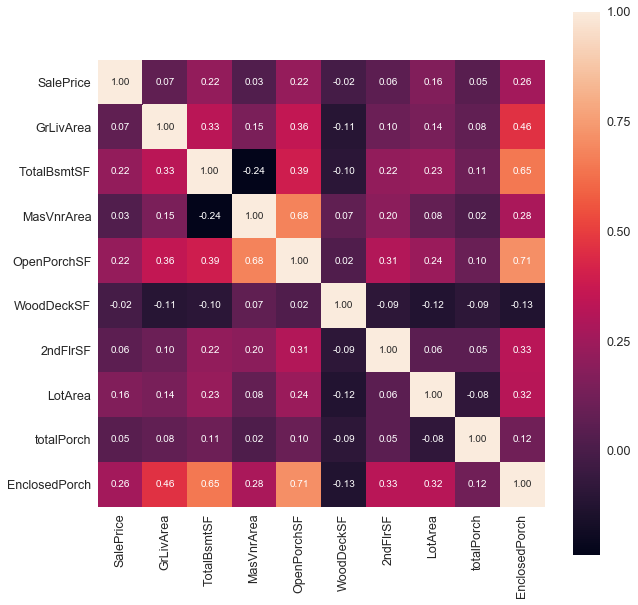

In [262]:
#vizualize and find out quantitative variables which are correlated with saleprice
quan1=Quantitative+['SalePrice']
corrmat = df[quan1].corr()


fig, ax = plt.subplots(figsize=(20,20)) 
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[quan1].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#from the heat map, we see that WoodDeckSF, LotArea, TotalBSMTSF are correlated with SalePrice


#how to treat less correlated variables (idea here is to either delete, merge columns inorder to reduce dimension)
#1. 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' are not correlated with SalePrice. We can drop all and only consider TotalBSMTSF
df.loc[df.PoolArea>0,'PoolArea'].count()
#2. only 5 House has pool area. We can drop this column.
df.loc[df.ScreenPorch>0,'ScreenPorch'].count()
df.loc[df['3SsnPorch']>0,'3SsnPorch'].count()
#3. only 115 and 24 houses have 3SsnPorch	EnclosedPorch respectively. We will add these two col together and name it has total_porch
#4. Only 25 values of LowQualFinSF are greater than 0. Not Correlated at all. We will drop the column
#5. MiscVal is not correlated with salePrice (R2=0) removing the feature
#6. Pool
#By looking at their distribution previously(in step 5), we found that they are skews and not normal distibution.
#we will focus on transforming the quantitative variables.

Quantitative.remove('BsmtFinSF1')
Quantitative.remove('BsmtFinSF2')
Quantitative.remove('BsmtUnfSF')
Quantitative.remove('PoolArea')
df['totalPorch']=df['ScreenPorch']+df['3SsnPorch']
#add the new feature to the continuous variable list
Quantitative.append('totalPorch')
Quantitative.remove('ScreenPorch')
Quantitative.remove('3SsnPorch')
Quantitative.remove('LowQualFinSF')
Quantitative.remove('MiscVal')

#transforming to normal distribution (Check next section for a detailed step by step procedure as to whats happening)
from sklearn.preprocessing import PowerTransformer
quant_transform={}

for col in Quantitative:
    quant_transform[col] =PowerTransformer(method='box-cox', standardize=False)
    quant_transform[col].fit(np.array(df[[col]]+0.01).reshape(-1,1))
    df[col+'_standardized']=quant_transform[col].transform(np.array(df[[col]]+0.01).reshape(-1,1))
    # viz the distribution
    f,(ax1,ax2)=plt.subplots(nrows=2,ncols=1, figsize=(12,6))
    col1=col+'_standardized'
    print(col1)
    print('skew: ',df[col1].skew())
    print('Kurtosis: ',df[col1].kurt())
    sns.boxplot(df[col1], ax=ax1)
    sns.distplot(df[col1], ax=ax2)
    plt.show()

print('------these are the objects-------')
print(quant_transform)


#Now check the correlation Matrix
print('---------Sale price correlation with the selected variables----------')
quan1=Quantitative+['SalePrice']
corrmat = df[quan1].corr()


fig, ax = plt.subplots(figsize=(10,10)) 
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[quan1].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#still few less influencial variables are not correlated. As of now I'm including them in the model
# will test out lasso regularization for feature selection



In [ ]:
#Simple Multiple Regression Model

#1. Transform the validation data set
#2. Buid the model with train data set
#3. Score validation set
#5. 

In [ ]:
#try out K-fold cross validation while building the model

In [ ]:
#Lasso

In [ ]:
#Ridge

In [ ]:
#elastic net